# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [7]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/competitions/moviegenres/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rameshdkoppad
Your Kaggle Key: ··········


100%|██████████| 11.8M/11.8M [00:00<00:00, 77.0MB/s]


Extracting archive ./moviegenres/moviegenres.zip to ./moviegenres


In [10]:
# Loading the dataset
df = pd.read_csv('/content/moviegenres/train.csv')
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


# **Exploring the dataset**

In [11]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [12]:
df.shape

(22579, 3)

In [13]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [14]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

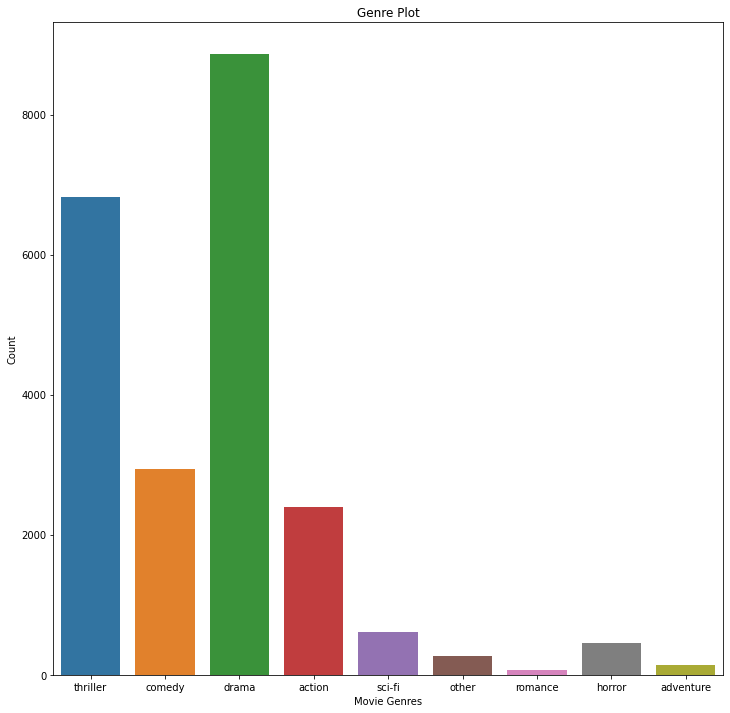

In [15]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [16]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [17]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [18]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [19]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [20]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df.shape

(22579, 2)

In [22]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [23]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [24]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [25]:
len(corpus)

22579

In [26]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

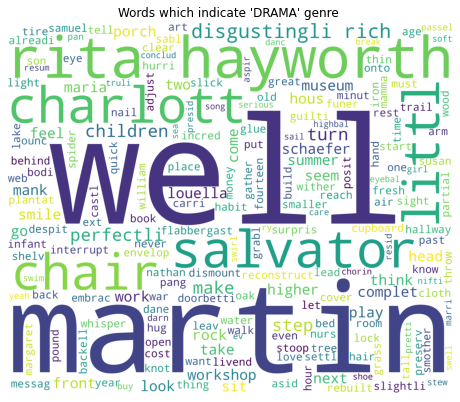

In [27]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

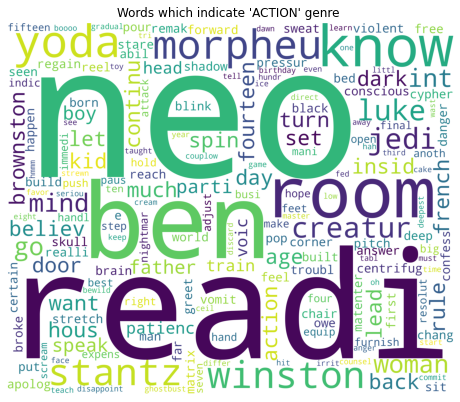

In [28]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

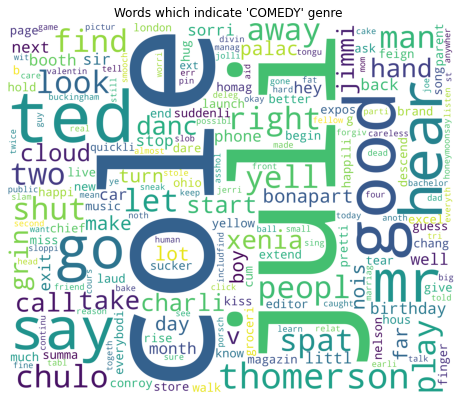

In [29]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [31]:
y = df['genre'].values

# **Model Building**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [35]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [37]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

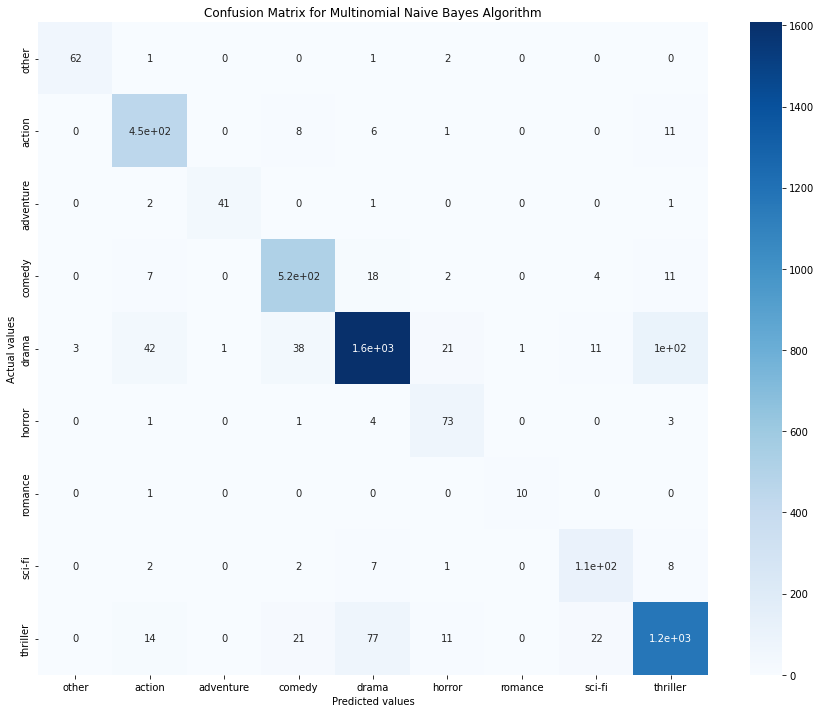

In [38]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [39]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [40]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [41]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [42]:
# For generating random integer
from random import randint

In [44]:
# Loading test dataset
test = pd.read_csv('/content/moviegenres/test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [45]:
test.shape

(5589, 2)

In [46]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [47]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: t it appears he is thinking about it. He lowers the blade, but his need to kill is to strong. He raises it again. DAVID She has to die! His face tenses. He lunges towards Erica. BANG! A shot tears through his chest. The impact blows him off his feet. He falls back into the murky water and disappears. Peter stands in the doorway, straining to stay conscious, Frank's GUN aimed at David. Kathy quickly finishes untying Erica. They run to the corner of the room. Kathy holds her close. Peter slowly staggers forward. He probes the water with his feet, checking for David's body. The MURKY WATER, THE STEAM and the BLINKING LIGHTS don't make it easy. Peter leans over, pointing the gun at the ground. PETER'S POV The MURKY WATER. Suddenly, a HAND streaks out of the water. The hand grabs Peter around the neck. David stands up quickly. They struggle over the gun. They both fall backwards into the water. Peter surfaces and crawls backwards. David stands up. They locks eyes. Peter stares back 

In [48]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: w you doing? It's Poldek Pfefferberg out in the hall. PFEFFERBERG Good. How's it going? SCHINDLER Things are great, things are great. Things don't look so great. Schindler isn't penniless, but he's not far from it, living alone in the one room behind him. PFEFFERBERG What are you doing? SCHINDLER I'm having a drink, come on in, we'll have a drink. PFEFFERBERG I mean where have you been? Nobody's seen you around for a while. SCHINDLER puzzled I've been here. I guess I haven't been out. PFEFFERBERG I thought maybe you'd like to come over, have some dinner, some of the people are coming over. SCHINDLER Yeah? Yeah, that'd be nice, let me get my coat. Pfefferberg waits out in the hall as Schindler disappears inside for a minute. The legend below appears AMON GOETH WAS ARRESTED AGAIN, WHILE A PATIENT IN AN SANITARIUM AT BAD TOLZ. GIVING THE NATIONAL SOCIALIST SALUTE, HE WAS HANGED IN CRACOW FOR CRIMES AGAINST HUMANITY. Schindler reappears wearing a coat, steps out into the hall, forg

In [49]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: s and starting the vehicles. A small exodus, the tractors pulling out of camp in a rush. Heading off in various directions. CAMERA FINDING THE CIGARETTE SMOKING MAN moving to his tractor, with THE MAN WHO SHOT MULDER. Taking the last drag of his cigarette before throwing it into the snow. He stares down at it a moment, as if caught in the grip of some emotion conflicting with duty. The Man who shot Mulder inside the tractor now, throwing open the door for the CSM. MAN WHO SHOT MULDER C'mon. It's all going to hell. He climbs up onto the vehicle, gets in and closes the door. And the vehicle pulls away as we CUT BACK TO INT. LOWER RIBBED CORRIDOR CONTINUOUS AGENT MULDER Back on his feet, SMASHING now at the crust of brittle blue ice that encases Scully. BASHING, SMASHING and then finally breaking through the hard outer later, its inner slushy contents spilling out of the puncture that exposes Scully's face and shoulder. Watery aqua tinted liquid drains from her mouth and nose. But

In [50]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: God! CUT TO 220 SHARK POV 220 The splashing Gondola Car. CUT TO 221 SEAN AND KELLY 221 White knuckled as the car starts to rise up. SEAN Let's go, let's go! KELLY It's okay, Sean. SEAN Take it up. KELLY He's diving! 222 THE FIN 222 Disappears. 223 THE GONDOLA 223 Slowly rises. Now ten feet above the water. KELLY big sigh We made it. It can't get us. Sean still stares through the glass bottom at the water. SEAN Take it up! KELLY SEAN! Kelly has reason to scream, for 224 THE SHARK 224 Comes BURSTING out of the water at them. SEAN NO! 225 SHARK 225 Lunges high into the air, giant jaws open wide, rows of teeth bared. It clamps down on the rising gondola. SHOCK CUT TO 226 SEAN AND KELLY 226 As they look into the jaws of death. Kelly SCREAMS. CUT BACK TO 227 SHARK AND GONDOLA 227 As the car comes crashing back into the water, being torn apart by the giant. Kelly's SCREAM is still heard. DISSOLVE TO 228 AMBULANCE SCREAMING 228 It's SIREN crying out as the ambulance RACES through the s

In [51]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: es his desk flamboyantly with a cloth, much to the spluttering amusement of his classmates. TEACHER Harper, what fraction of the earth's surface is British? HARPER Don't know, Miss. TEACHER Anyone? A girl shoots up her hand. JENNIFER BAKER. JENNIFER Two fifths, Miss. TEACHER Yes. Two fifths. Ours. And that's what the war is all about. Men are fighting and dying to save the pink bits for you ungrateful little twerps. The pinched little faces find this notion difficult to absorb. They stare back blankly at the British Empire. A SIREN SOUNDS an air raid warning. TEACHER Books away! Scramble! They grab their gasmasks and run from the class, cheering. EXT. SCHOOLYARD DAY The children swarm to the shelters, which are long narrow concrete structures in sandbags to absorb blast. INT. SHELTERS DAY The children file in mostly, laughing and chatting. There are clattering duckboards on the ground affording cover from an inch or two of water. Along each side of the shelters are narrow bench